In [22]:
import pandas as pd
import gzip

# Define file paths
file_paths = [
    r"C:\Users\DELL\Documents\GitHub\NLPINSURANCE-FINTECHPROJ\dataset insurance qa\InsuranceQA.question.anslabel.raw.100.pool.solr.train.encoded.gz",
    r"C:\Users\DELL\Documents\GitHub\NLPINSURANCE-FINTECHPROJ\dataset insurance qa\InsuranceQA.question.anslabel.raw.100.pool.solr.valid.encoded.gz",
    r"C:\Users\DELL\Documents\GitHub\NLPINSURANCE-FINTECHPROJ\dataset insurance qa\InsuranceQA.question.anslabel.raw.100.pool.solr.test.encoded.gz"
]

# Function to load the compressed files
def load_gz_file(file_path):
    with gzip.open(file_path, 'rt', encoding='utf-8') as f:
        lines = f.readlines()
    return [line.strip().split("\t") for line in lines]

# Load data
train_data = load_gz_file(file_paths[0])
valid_data = load_gz_file(file_paths[1])
test_data = load_gz_file(file_paths[2])

# Convert to DataFrames
columns = ["Domain", "Question", "Answer_Label", "Answer_Pool"]
df_train = pd.DataFrame(train_data, columns=columns)
df_valid = pd.DataFrame(valid_data, columns=columns)
df_test = pd.DataFrame(test_data, columns=columns)

# Show first few rows
print(df_train.head())


                 Domain                                           Question  \
0  disability-insurance  idx_3815 idx_432 idx_136 idx_25338 idx_1655 id...   
1        life-insurance  idx_3019 idx_16371 idx_5499 idx_448 idx_136 id...   
2     renters-insurance  idx_1010 idx_5574 idx_136 idx_9744 idx_999 idx...   
3        auto-insurance  idx_3019 idx_99 idx_35296 idx_382 idx_3876 idx...   
4        life-insurance  idx_3815 idx_76 idx_4928 idx_6980 idx_6981 idx...   

                  Answer_Label  \
0                        20798   
1                        26354   
2                         5068   
3  10691 3789 16503 21676 5949   
4                  18502 23498   

                                         Answer_Pool  
0  9590 21552 24798 5593 18674 19388 1752 10669 2...  
1  13324 23395 7870 15080 27181 25052 26694 568 2...  
2  5068 19705 9939 20063 11494 12175 26875 14073 ...  
3  9520 9571 3810 17013 9088 13523 7107 9967 1064...  
4  7781 14207 25237 4358 522 5746 11839 6166 516 ..

#### Load Questions & Answers

In [4]:
import gzip

# Load vocabulary
vocab = {}
with open(r"C:\Users\DELL\Documents\GitHub\NLPINSURANCE-FINTECHPROJ\dataset insurance qa\vocabulary", "r", encoding="utf-8") as f:  
    for line in f:
        parts = line.strip().split("\t")
        if len(parts) == 2:
            vocab[parts[0]] = parts[1]  # Map idx_xxxx to actual words

# Load Questions File
questions = []
with gzip.open(r"C:\Users\DELL\Documents\GitHub\NLPINSURANCE-FINTECHPROJ\dataset insurance qa\InsuranceQA.question.anslabel.raw.500.pool.solr.test.encoded.gz", "rt", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split("\t")
        if len(parts) >= 3:
            domain, question, groundtruth = parts[:3]
            decoded_question = " ".join([vocab.get(word, word) for word in question.split()])
            questions.append((decoded_question, groundtruth))

# Convert to DataFrame
import pandas as pd
df_questions = pd.DataFrame(questions, columns=["Question", "Answer_Label"])


#### Load and Decode Answers

In [5]:
# Load Answers File
answers = {}
with gzip.open(r"C:\Users\DELL\Documents\GitHub\NLPINSURANCE-FINTECHPROJ\dataset insurance qa\InsuranceQA.label2answer.raw.encoded.gz", "rt", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split("\t")
        if len(parts) == 2:
            answer_label, answer_text = parts
            decoded_answer = " ".join([vocab.get(word, word) for word in answer_text.split()])
            answers[answer_label] = decoded_answer

# Add Answer Text to Questions
df_questions["Answer"] = df_questions["Answer_Label"].map(answers)
df_questions.dropna(inplace=True)  # Remove rows with missing answers
print(df_questions.head())  # Check dataset structure


                                            Question Answer_Label  \
2  Does Owning A Pitbull Raise Homeowners Insurance?        26439   
3  What Should You Look For In Long Term Care Ins...         6996   
4           Will Medicare Pay For Smoking Cessation?         9128   
5                    What Is Eoi For Life Insurance?        14495   
7  Why Is Health Insurance So Expensive In New York?         3183   

                                              Answer  
2  Most insurance companies do not surcharge for ...  
3  Every product purchase has a value proposition...  
4  Medicare will not pay for smoking cessation pr...  
5  EOI in life insurance stands for "evidence of ...  
7  This question was asked before implementation ...  


#### Preprocess Both Questions and Answers

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("stopwords")
nltk.download("punkt")

# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words("english")]  # Remove stopwords
    tokens = [word for word in tokens if len(word) > 2]  # Remove short words
    return tokens

df_questions["Processed_Answer"] = df_questions["Answer"].apply(preprocess_text)
print(df_questions.head())  # Check processed output


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


                                            Question Answer_Label  \
2  Does Owning A Pitbull Raise Homeowners Insurance?        26439   
3  What Should You Look For In Long Term Care Ins...         6996   
4           Will Medicare Pay For Smoking Cessation?         9128   
5                    What Is Eoi For Life Insurance?        14495   
7  Why Is Health Insurance So Expensive In New York?         3183   

                                              Answer  \
2  Most insurance companies do not surcharge for ...   
3  Every product purchase has a value proposition...   
4  Medicare will not pay for smoking cessation pr...   
5  EOI in life insurance stands for "evidence of ...   
7  This question was asked before implementation ...   

                                    Processed_Answer  
2  [insurance, companies, surcharge, animals, ins...  
3  [every, product, purchase, value, proposition,...  
4  [medicare, pay, smoking, cessation, products, ...  
5  [eoi, life, insurance, st

##### Perform Topic Modeling on Answers 

In [7]:
from gensim import corpora, models

# Create Dictionary and Corpus
dictionary = corpora.Dictionary(df_questions["Processed_Answer"])
corpus = [dictionary.doc2bow(text) for text in df_questions["Processed_Answer"]]

# Train LDA Model
num_topics = 5
lda_model = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    alpha="auto"
)

# Print Topics
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic}")


Topic 0: 0.029*"insurance" + 0.024*"health" + 0.012*"care" + 0.007*"may" + 0.006*"companies" + 0.006*"coverage" + 0.006*"many" + 0.006*"best" + 0.006*"employees" + 0.005*"group"
Topic 1: 0.027*"insurance" + 0.017*"policy" + 0.013*"life" + 0.012*"annuities" + 0.012*"annuity" + 0.008*"term" + 0.008*"income" + 0.008*"company" + 0.006*"tax" + 0.006*"deferred"
Topic 2: 0.050*"insurance" + 0.024*"policy" + 0.019*"life" + 0.014*"coverage" + 0.009*"would" + 0.008*"may" + 0.007*"home" + 0.007*"company" + 0.006*"agent" + 0.006*"insured"
Topic 3: 0.037*"medicare" + 0.027*"plan" + 0.015*"part" + 0.014*"insurance" + 0.013*"health" + 0.012*"plans" + 0.010*"pay" + 0.010*"care" + 0.009*"coverage" + 0.007*"benefits"
Topic 4: 0.027*"policy" + 0.023*"coverage" + 0.015*"insurance" + 0.013*"care" + 0.012*"long" + 0.010*"term" + 0.009*"damage" + 0.008*"may" + 0.007*"would" + 0.007*"covered"


##### Assign Topics to Each Answer

In [8]:
# Assign dominant topic to each answer
def get_topic(text):
    bow = dictionary.doc2bow(preprocess_text(text))
    topics = lda_model.get_document_topics(bow)
    return sorted(topics, key=lambda x: -x[1])[0][0]  # Return topic with highest probability

df_questions["Topic"] = df_questions["Answer"].apply(get_topic)
print(df_questions.head(10))


                                             Question Answer_Label  \
2   Does Owning A Pitbull Raise Homeowners Insurance?        26439   
3   What Should You Look For In Long Term Care Ins...         6996   
4            Will Medicare Pay For Smoking Cessation?         9128   
5                     What Is Eoi For Life Insurance?        14495   
7   Why Is Health Insurance So Expensive In New York?         3183   
8           When Do We Have To Have Health Insurance?        12919   
9            How To Submit A Renters Insurance Claim?        19814   
11  Why Is My Car Insurance Claim Being Investigated?         3985   
13    Can A Corporation Pay For Disability Insurance?        26054   
14  Will Homeowners Insurance Cover A Tree Falling...        12753   

                                               Answer  \
2   Most insurance companies do not surcharge for ...   
3   Every product purchase has a value proposition...   
4   Medicare will not pay for smoking cessation pr...   
5

##### Visualize Topics

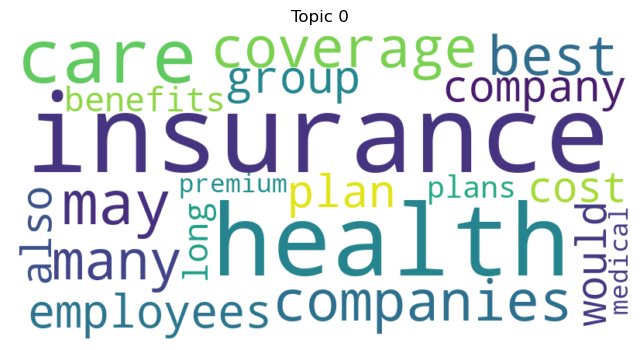

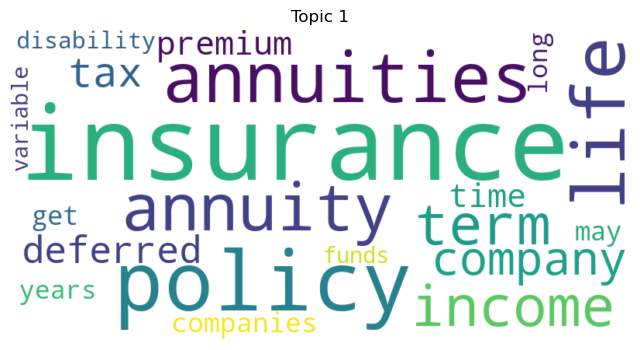

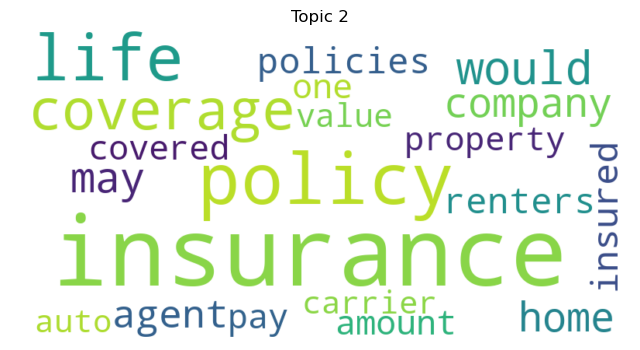

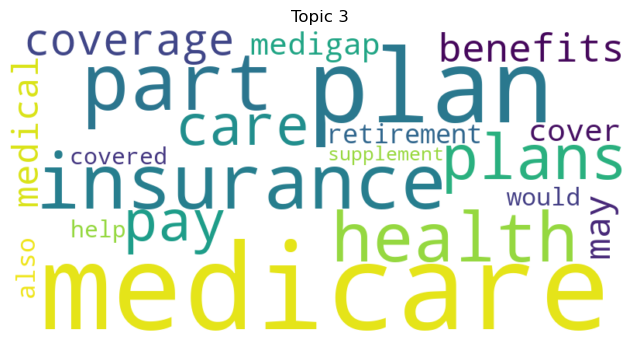

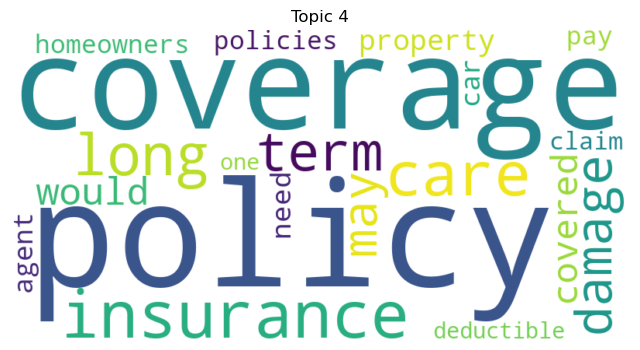

In [13]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# PyLDAvis Visualization
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

# Word Cloud for Topics
for t in range(num_topics):
    plt.figure(figsize=(8, 6))
    wordcloud = WordCloud(background_color='white', width=800, height=400)
    topic_words = dict(lda_model.show_topic(t, 20))
    wordcloud.generate_from_frequencies(topic_words)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {t}")
    plt.show()


In [ ]:
pip install pyLDAvis


     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ---------------------------------------- 59.0/59.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of pyfume to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.6 MB 2.6 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/2.6 MB 2.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.2/2.6 MB 1.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.6 MB 1.6 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.6 MB 1.6 MB/s eta 0:00:02
   ----- ---------------------------------- 0.4/2.6 

In [12]:
pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/299.9 kB 217.9 kB/s eta 0:00:02
   ------ -------------------------------- 51.2/299.9 kB 327.7 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/299.9 kB 893.0 kB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
topic_number = 0  # Specify the topic you want to display
topic_0_df = df_questions[df_questions["Topic"] == topic_number]

# Print all questions and answers for Topic 0
print(topic_0_df[['Question', 'Answer']].to_string(index=False))


                                                                                      Question                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [16]:
print(lda_model.show_topic(0, topn=10))  # Show top 10 words in Topic 0


[('insurance', 0.029259313), ('health', 0.024143722), ('care', 0.012373034), ('may', 0.007456045), ('companies', 0.006220597), ('coverage', 0.0061770133), ('many', 0.0057709822), ('best', 0.0056957286), ('employees', 0.005504549), ('group', 0.0053526997)]


In [17]:
print(lda_model.show_topic(1, topn=10))

[('insurance', 0.026763685), ('policy', 0.016752543), ('life', 0.012968834), ('annuities', 0.011936914), ('annuity', 0.011583134), ('term', 0.008469384), ('income', 0.008385735), ('company', 0.008306067), ('tax', 0.006499074), ('deferred', 0.0055277217)]


In [18]:
print(lda_model.show_topic(2, topn=10))

[('insurance', 0.049747292), ('policy', 0.023644147), ('life', 0.019167459), ('coverage', 0.014362546), ('would', 0.009172373), ('may', 0.007548825), ('home', 0.0071275746), ('company', 0.007110396), ('agent', 0.0064410325), ('insured', 0.0055848313)]


In [19]:
print(lda_model.show_topic(3, topn=10))

[('medicare', 0.036854655), ('plan', 0.026850022), ('part', 0.01501024), ('insurance', 0.013925462), ('health', 0.012992571), ('plans', 0.012282519), ('pay', 0.010225618), ('care', 0.009975248), ('coverage', 0.009220088), ('benefits', 0.0073847747)]


In [20]:
print(lda_model.show_topic(4, topn=10))

[('policy', 0.026640307), ('coverage', 0.022847565), ('insurance', 0.015168544), ('care', 0.013492123), ('long', 0.011735961), ('term', 0.01030418), ('damage', 0.009096643), ('may', 0.007844258), ('would', 0.0072780903), ('covered', 0.006675883)]


In [21]:
# Define topic names based on above analysis of top words in each topic
topic_names = {
    0: "Health Insurance & Employee Benefits",
    1: "Life Insurance & Annuities",
    2: "General Insurance Policies & Coverage",
    3: "Medicare & Health Insurance Plans",
    4: "Insurance Policies & Long-Term Care"
}

# Map topic names to the DataFrame
df_questions["Topic_Name"] = df_questions["Topic"].map(topic_names)

# Display the updated DataFrame
print(df_questions[["Topic", "Topic_Name"]].drop_duplicates())


    Topic                             Topic_Name
2       4    Insurance Policies & Long-Term Care
4       2  General Insurance Policies & Coverage
7       3      Medicare & Health Insurance Plans
11      0   Health Insurance & Employee Benefits
18      1             Life Insurance & Annuities
